# Downloading and Prepping Data <a id="2"></a>

Import primary modules.

In [83]:
import numpy as np  # useful for many scientific computing in Python
import pandas as pd # primary data structure library
import matplotlib as mpl
import matplotlib.pyplot as plt

Download the dataset and read it into a *pandas* dataframe.

In [3]:
df_can = pd.read_excel('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/Canada.xlsx',
                       sheet_name='Canada by Citizenship',
                       skiprows=range(20),
                       skipfooter=2
                      )

print('Data downloaded and read into a dataframe!')

Data downloaded and read into a dataframe!


Clean up data. We will make some modifications to the original dataset to make it easier to create our visualizations. Refer to *Introduction to Matplotlib and Line Plots* and *Area Plots, Histograms, and Bar Plots* for a detailed description of this preprocessing.

In [4]:
# clean up the dataset to remove unnecessary columns (eg. REG) 
df_can.drop(['AREA', 'REG', 'DEV', 'Type', 'Coverage'], axis=1, inplace=True)

# let's rename the columns so that they make sense
df_can.rename(columns={'OdName':'Country', 'AreaName':'Continent','RegName':'Region'}, inplace=True)

# for sake of consistency, let's also make all column labels of type string
df_can.columns = list(map(str, df_can.columns))

# set the country name as index - useful for quickly looking up countries using .loc method
df_can.set_index('Country', inplace=True)

# add total column
df_can['Total'] = df_can.sum(axis=1)

# years that we will be using in this lesson - useful for plotting later on
years = list(map(str, range(1980, 2014)))
print('data dimensions:', df_can.shape)

data dimensions: (195, 38)


**Question 1:** Using a pie chart, explore the proportion (percentage) of new immigrants grouped by continents in the year 2013.

**Note**: You might need to play with the explore values in order to fix any overlapping slice values.

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>


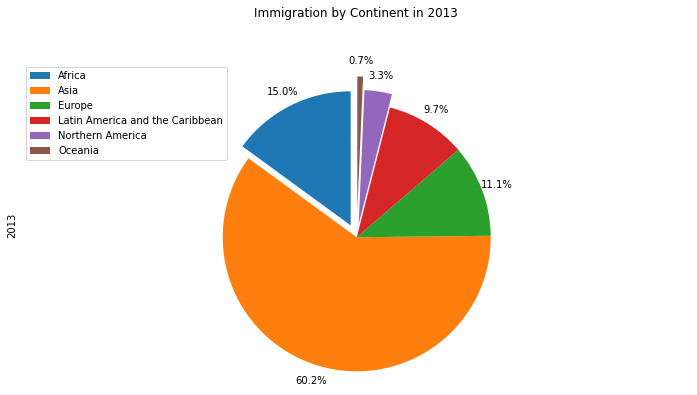

In [37]:
### type your answer here
df_continents = df_can.groupby('Continent', axis=0).sum()
print(type(df_can.groupby('Continent', axis=0)))
df_continents.head()
explode_list = [0.1, 0, 0, 0, 0.1, 0.2]
df_continents['2013'].plot(kind='pie',
                            figsize=(12, 6),
                            autopct='%1.1f%%', 
                            startangle=90,           
                            labels=None,                 
                            pctdistance=1.12,           
                            explode=explode_list         
                            )
plt.title('Immigration by Continent in 2013', y=1.12) 
plt.axis('equal') 
plt.legend(labels=df_continents.index, loc='upper left') 
plt.show()

**Question 2:** Compare the distribution of the number of new immigrants from India and China for the period 1980 - 2013.

Step 1: Get the dataset for China and India and call the dataframe **df_CI**.

In [31]:
### type your answer here
df_CI = df_can.loc[['China','India'], years].transpose()
df_CI.head()

Country,China,India
1980,5123,8880
1981,6682,8670
1982,3308,8147
1983,1863,7338
1984,1527,5704


Step 2: Plot data.

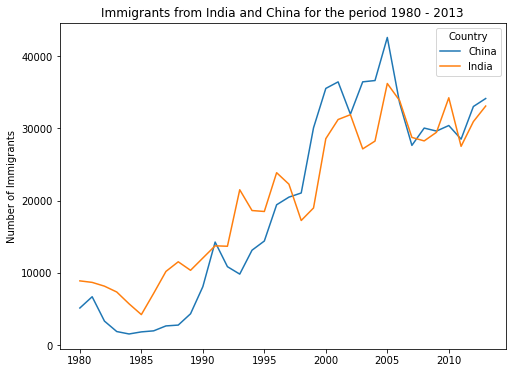

In [42]:
### type your answer here
df_CI.plot(kind='line', figsize=(8, 6))
plt.title('Immigrants from India and China for the period 1980 - 2013')
plt.ylabel('Number of Immigrants')
plt.show()

**Question 3:** Create a box plot to visualize the distribution of the top 15 countries (based on total immigration) grouped by the *decades* `1980s`, `1990s`, and `2000s`.

Step 1: Get the dataset. Get the top 15 countries based on Total immigrant population. Name the dataframe **df_top15**.

In [84]:
### type your answer here
df_top15 = df_can.sort_values(['Total'], ascending=False, axis=0).head(15)

Step 2: Create a new dataframe which contains the aggregate for each decade. One way to do that:
   1. Create a list of all years in decades 80's, 90's, and 00's.
   2. Slice the original dataframe df_can to create a series for each decade and sum across all years for each country.
   3. Merge the three series into a new data frame. Call your dataframe **new_df**.

In [47]:
### type your answer here
# Create a list of all years in decades 80's, 90's, and 00's.
years80s = list(map(str, range(1980, 1990))) 
years90s = list(map(str, range(1990, 2000))) 
years00s = list(map(str, range(2000, 2010)))

# Slice the original dataframe df_can to create a series for each decade and sum across all years for each country.
df_80s = df_top15.loc[:, years80s].sum(axis=1) 
df_90s = df_top15.loc[:, years90s].sum(axis=1) 
df_00s = df_top15.loc[:, years00s].sum(axis=1)

# Merge the three series into a new data frame. Call your dataframe new_df.
new_df = pd.DataFrame({'1980s': df_80s, '1990s': df_90s, '2000s':df_00s}) 

Step 3: Plot the box plots.

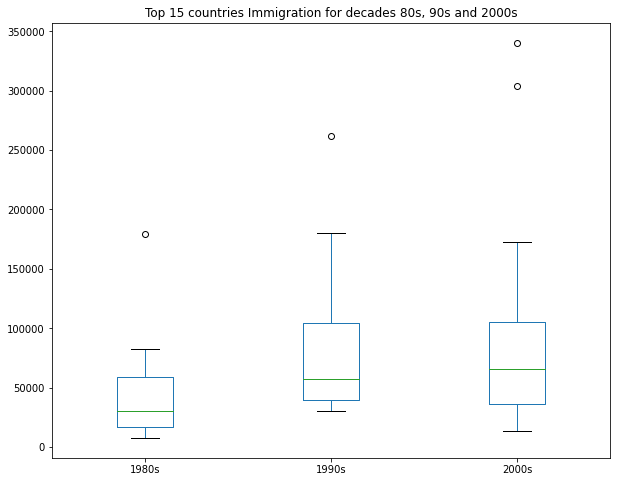

In [81]:
### type your answer here
new_df.plot(kind='box', figsize=(10, 8))
plt.title('Top 15 countries Immigration for decades 80s, 90s and 2000s')
plt.show()

**Question 4**: Create a scatter plot of the total immigration from Denmark, Norway, and Sweden to Canada from 1980 to 2013?

Step 1: Get the data:
   1. Create a dataframe the consists of the numbers associated with Denmark, Norway, and Sweden only. Name it **df_countries**.
   2. Sum the immigration numbers across all three countries for each year and turn the result into a dataframe. Name this new dataframe **df_total**.
   3. Reset the index in place.
   4. Rename the columns to **year** and **total**.
   5. Display the resulting dataframe.

In [49]:
### type your answer here
# Create a dataframe the consists of the numbers associated with Denmark, Norway, and Sweden only. Name it df_countries.
df_countries = df_can.loc[['Denmark', 'Norway', 'Sweden'],years].transpose()

# Sum the immigration numbers across all three countries for each year and turn the result into a dataframe. Name this new dataframe df_total.
df_total = pd.DataFrame(df_countries.sum(axis=1))

# Reset index in place
df_total.reset_index(inplace=True)

 # Rename the columns to year and total.
df_total.columns = ['year', 'total']

# Change year into int to create scatter plot
df_total['year'] = df_total['year'].astype(int)

# show resulting dataframe
df_total.head()

,year,total
0,1980,669
1,1981,678
2,1982,627
3,1983,333
4,1984,252


Step 2: Generate the scatter plot by plotting the total versus year in **df_total**.

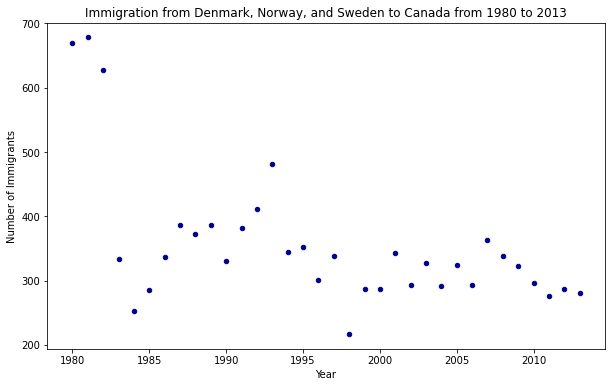

In [50]:
### type your answer here
df_total.plot(kind='scatter', x='year', y='total', figsize=(10, 6), color='darkblue')
plt.title('Immigration from Denmark, Norway, and Sweden to Canada from 1980 to 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')
plt.show()

**Question 5**: Previously in this lab, we created box plots to compare immigration from China and India to Canada. Create bubble plots of immigration from China and India to visualize any differences with time from 1980 to 2013. You can use **df_can_t** that we defined and used in the previous example.

Step 1: Normalize the data pertaining to China and India.

In [67]:
### type your answer 
df_can_t = df_can[years].transpose()
df_can_t.index = map(int, df_can_t.index)
df_can_t.index.name = 'Year'
df_can_t.reset_index(inplace=True)
norm_china = (df_can_t['China'] - df_can_t['China'].min()) / (df_can_t['China'].max() - df_can_t['China'].min())
norm_india = (df_can_t['India'] - df_can_t['India'].min()) / (df_can_t['India'].max() - df_can_t['India'].min())

Step 2: Generate the bubble plots.

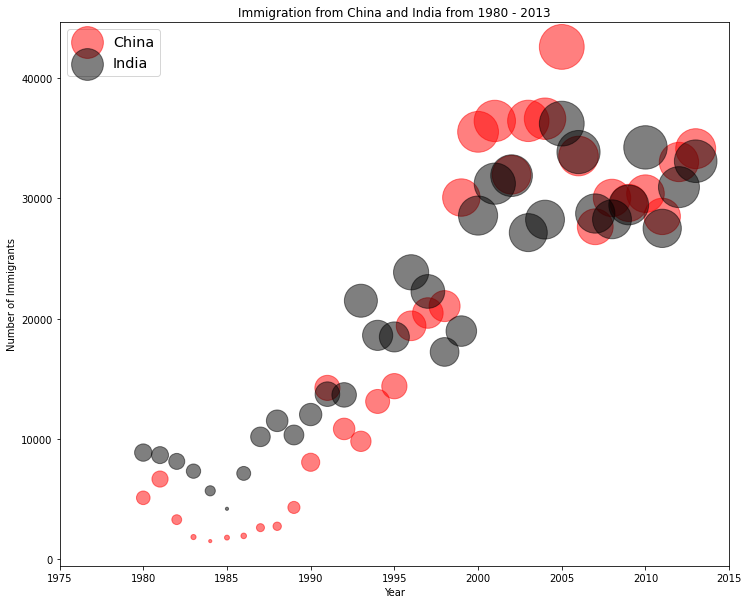

In [80]:
### type your answer here
ax0 = df_can_t.plot(kind='scatter',
                    x='Year',
                    y='China',
                    figsize=(12, 10),
                    alpha=0.5,       
                    color='red',
                    s=norm_china * 2000 + 10,  
                    xlim=(1975, 2015)
                   )
ax1 = df_can_t.plot(kind='scatter',
                    x='Year',
                    y='India',
                    alpha=0.5,
                    color="black",
                    s=norm_india * 2000 + 10,
                    ax = ax0
                   )
ax0.set_ylabel('Number of Immigrants')
ax0.set_title('Immigration from China and India from 1980 - 2013')
ax0.legend(['China', 'India'], loc='upper left', fontsize='x-large')

# Thank you for completing this lab!

<hr>

Copyright &copy; 2019 [Cognitive Class](https://cognitiveclass.ai/?utm_source=bducopyrightlink&utm_medium=dswb&utm_campaign=bdu). This notebook and its source code are released under the terms of the [MIT License](https://bigdatauniversity.com/mit-license/).

Reference :
https://www.kaggle.com/bavalpreet26/matplotlib-immigration-visualization

INTAN RAMADHANI - 1301184046